<a href="https://colab.research.google.com/github/pongsapaks/Data-science/blob/main/Book_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/pongsapaks/Data-science/main/log2.csv')  
df.shape

(65532, 12)

In [18]:
# Load the dataset
df = pd.read_csv('log2.csv')

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Action'], axis=1)
y = df['Action']

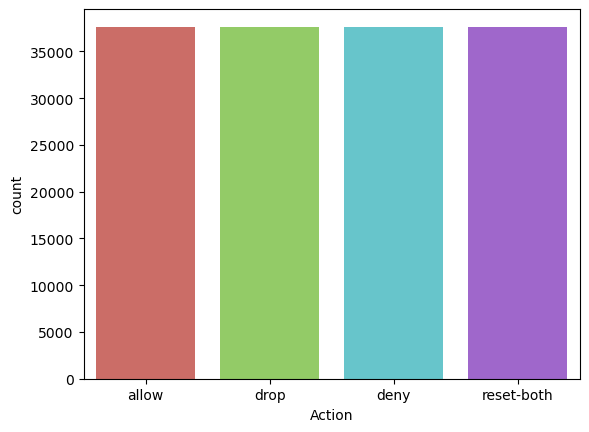

In [25]:
#Oversampling
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE (regular, svm)
sm = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = sm.fit_resample(X, y)

pca = PCA(n_components=4)
X_res_vis = pca.fit_transform(X_resampled)
sns.countplot(x=y_resampled,data=df,palette='hls')
plt.show()

In [28]:
#Check Shapiro test (Normaldistribution)
import scipy.stats
scipy.stats.shapiro(X_resampled)

ShapiroResult(statistic=0.0008409619331359863, pvalue=0.0)

In [31]:
#Normalization
x = (X_resampled - np.min(X_resampled)) / (np.max(X_resampled) / np.min(X_resampled)).values
x

/Users/pongsapak/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/pongsapak/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.0,0.0,0.0,0.0,5.530350e-06,2.150816e-06,0.0,9.651429e-07,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,2.225375e-04,9.741931e-05,0.0,1.737257e-05,0.0,0.000012,0.0
2,0.0,0.0,0.0,0.0,8.413695e-06,3.669039e-06,0.0,9.651429e-07,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,1.544244e-04,8.717131e-05,0.0,1.351200e-05,0.0,0.000009,0.0
4,0.0,0.0,0.0,0.0,1.195785e-03,4.249759e-04,0.0,2.895429e-05,0.0,0.000016,0.0
...,...,...,...,...,...,...,...,...,...,...,...
150555,0.0,0.0,0.0,0.0,3.970508e-06,5.313781e-06,0.0,0.000000e+00,0.0,0.000000,0.0
150556,0.0,0.0,0.0,0.0,3.923240e-06,5.250521e-06,0.0,0.000000e+00,0.0,0.000000,0.0
150557,0.0,0.0,0.0,0.0,4.159580e-06,5.566818e-06,0.0,0.000000e+00,0.0,0.000000,0.0
150558,0.0,0.0,0.0,0.0,4.726795e-07,6.325929e-07,0.0,0.000000e+00,0.0,0.000000,0.0
